$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N° 5 | Grupo 1}$$


Integrantes:
* Marco Aurelio Ramiro Lagones López
* Luis Eduardo Salazar Aguilar

**Problemática:** En un laboratorio de investigación, tres tesistas han recopilado moléculas que podrían ser activas contra el SARS-CoV-2, empleando la base de datos PubChem. Con ese objetivo emplean la herramienta chemmintetools y generan los descriptores moleculares adjuntos en el archivo "Challente5.csv". Al tesista A le interesan los derivados de curcumina (o familia molecular 1), al tesista B, los derivados de pirazinamida (o familia molecular 2) y al tesista C, los derivados de ácido ursólico (o familia molecular 3). Sin embargo, todas las moléculas están desordenadas en el mismo archivo.

**Actividad:** Emplea tus conocimientos en reducción de la dimensionalidad y aprendizaje no supervisado, para encontrar estas familias moleculares y asignarlas a cada tesista. No olvides verificar si solo hay 3 familias moleculares o si se han infiltrado más moléculas.

# Análisis exploratorio

Exploración de los datos (estadística) y comprensión de la información (descriptores moleculares)

## Carga de dataset y librerias

Se comienza con la carga de las librerías pertinentes para nuestro trabajo

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Se leen el dataframes:
* "Challenge5.csv": Dataframe con 39 columnas, de las que, la primera columna corresponde con el identificador de la molécula, las siguientes 38 son los descriptores moleculares de dichas moléculas.

In [30]:
df_train=pd.read_csv('Challenge5.csv')
print(df_train.shape)
df_train

(300, 39)


,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,53393977,396.438991,8.6718,30,6,0,0,0,0,0,...,0,0,71.06,16.429361,1.082601,14.175829,25.262222,13.420118,260,248
296,51136451,356.373991,5.9132,26,6,2,2,0,0,0,...,0,0,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
297,46946664,410.465990,8.5972,32,6,1,1,0,0,0,...,0,0,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272
298,46898924,425.412990,6.8134,28,8,1,2,1,0,0,...,0,0,122.19,15.917241,0.970202,15.406104,27.246094,14.302721,258,261


## Visualización de la data

Se comienza mostrando la descripción de los datos (todos los valores son del tipo numérico int64 o float64), donde se identifica que existen columnas con valores comunes para cada una de las 300 moléculas, tales columnas son:
* Number_of_hydrophobic_groups
* Number_of_B_atoms
* Number_of_SO_groups
* Number_of_OSO_groups

Por otro lado, la columna "Geometrical_shape" presenta un valor nulo, dicha fila será eliminada en la sección de "preprocesamiento".

In [31]:
# Se muestra la información del dataframe train.csv
print(df_train.info())
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
count,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.0,300.000000,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,3.601528e+07,334.807295,7.927830,30.133333,4.460000,1.433333,1.493333,0.323333,0.553333,0.043333,...,0.0,0.013333,75.364767,11.474213,0.945957,12.222353,19.532942,8.188036,268.383333,291.973333
std,4.067521e+07,142.954809,6.127177,18.272800,1.224772,0.864898,1.169551,0.522525,0.925569,0.285881,...,0.0,0.163026,22.637438,3.635444,0.169270,8.281095,8.096676,3.568366,176.785634,207.521283
min,1.046000e+03,122.115432,-1.765100,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,26.300000,6.792787,0.000000,5.665398,7.111111,3.164062,59.000000,62.000000
25%,5.281500e+06,185.874997,2.399200,13.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,60.360000,8.287358,0.967964,7.686705,11.076923,5.612245,95.000000,90.750000
50%,1.388871e+07,352.385992,6.627100,27.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,69.495000,11.217634,0.970923,10.949384,22.166238,7.527734,230.000000,233.000000
75%,6.880700e+07,456.710990,13.571075,48.000000,5.000000,2.000000,2.000000,1.000000,1.000000,0.000000,...,0.0,0.000000,85.400000,13.765704,1.007529,13.675099,25.641274,10.681295,462.000000,534.000000
max,1.560257e+08,917.629981,40.375700,118.000000,9.000000,4.000000,5.000000,2.000000,4.000000,2.000000,...,0.0,2.000000,161.800000,38.162784,1.085336,89.461191,56.908163,28.296312,1008.000000,1066.000000


Se eliminan las columnas (Number_of_hydrophobic_groups, Number_of_B_atoms, Number_of_SO_groups, Number_of_OSO_groups)

In [32]:
# Se eliminan las columnas especificadas
df_train = df_train.drop(["Number_of_hydrophobic_groups","Number_of_B_atoms","Number_of_SO_groups","Number_of_OSO_groups"], axis=1)

A continuación, se ve la distribución de la frecuencia de los distintos tipos de datos

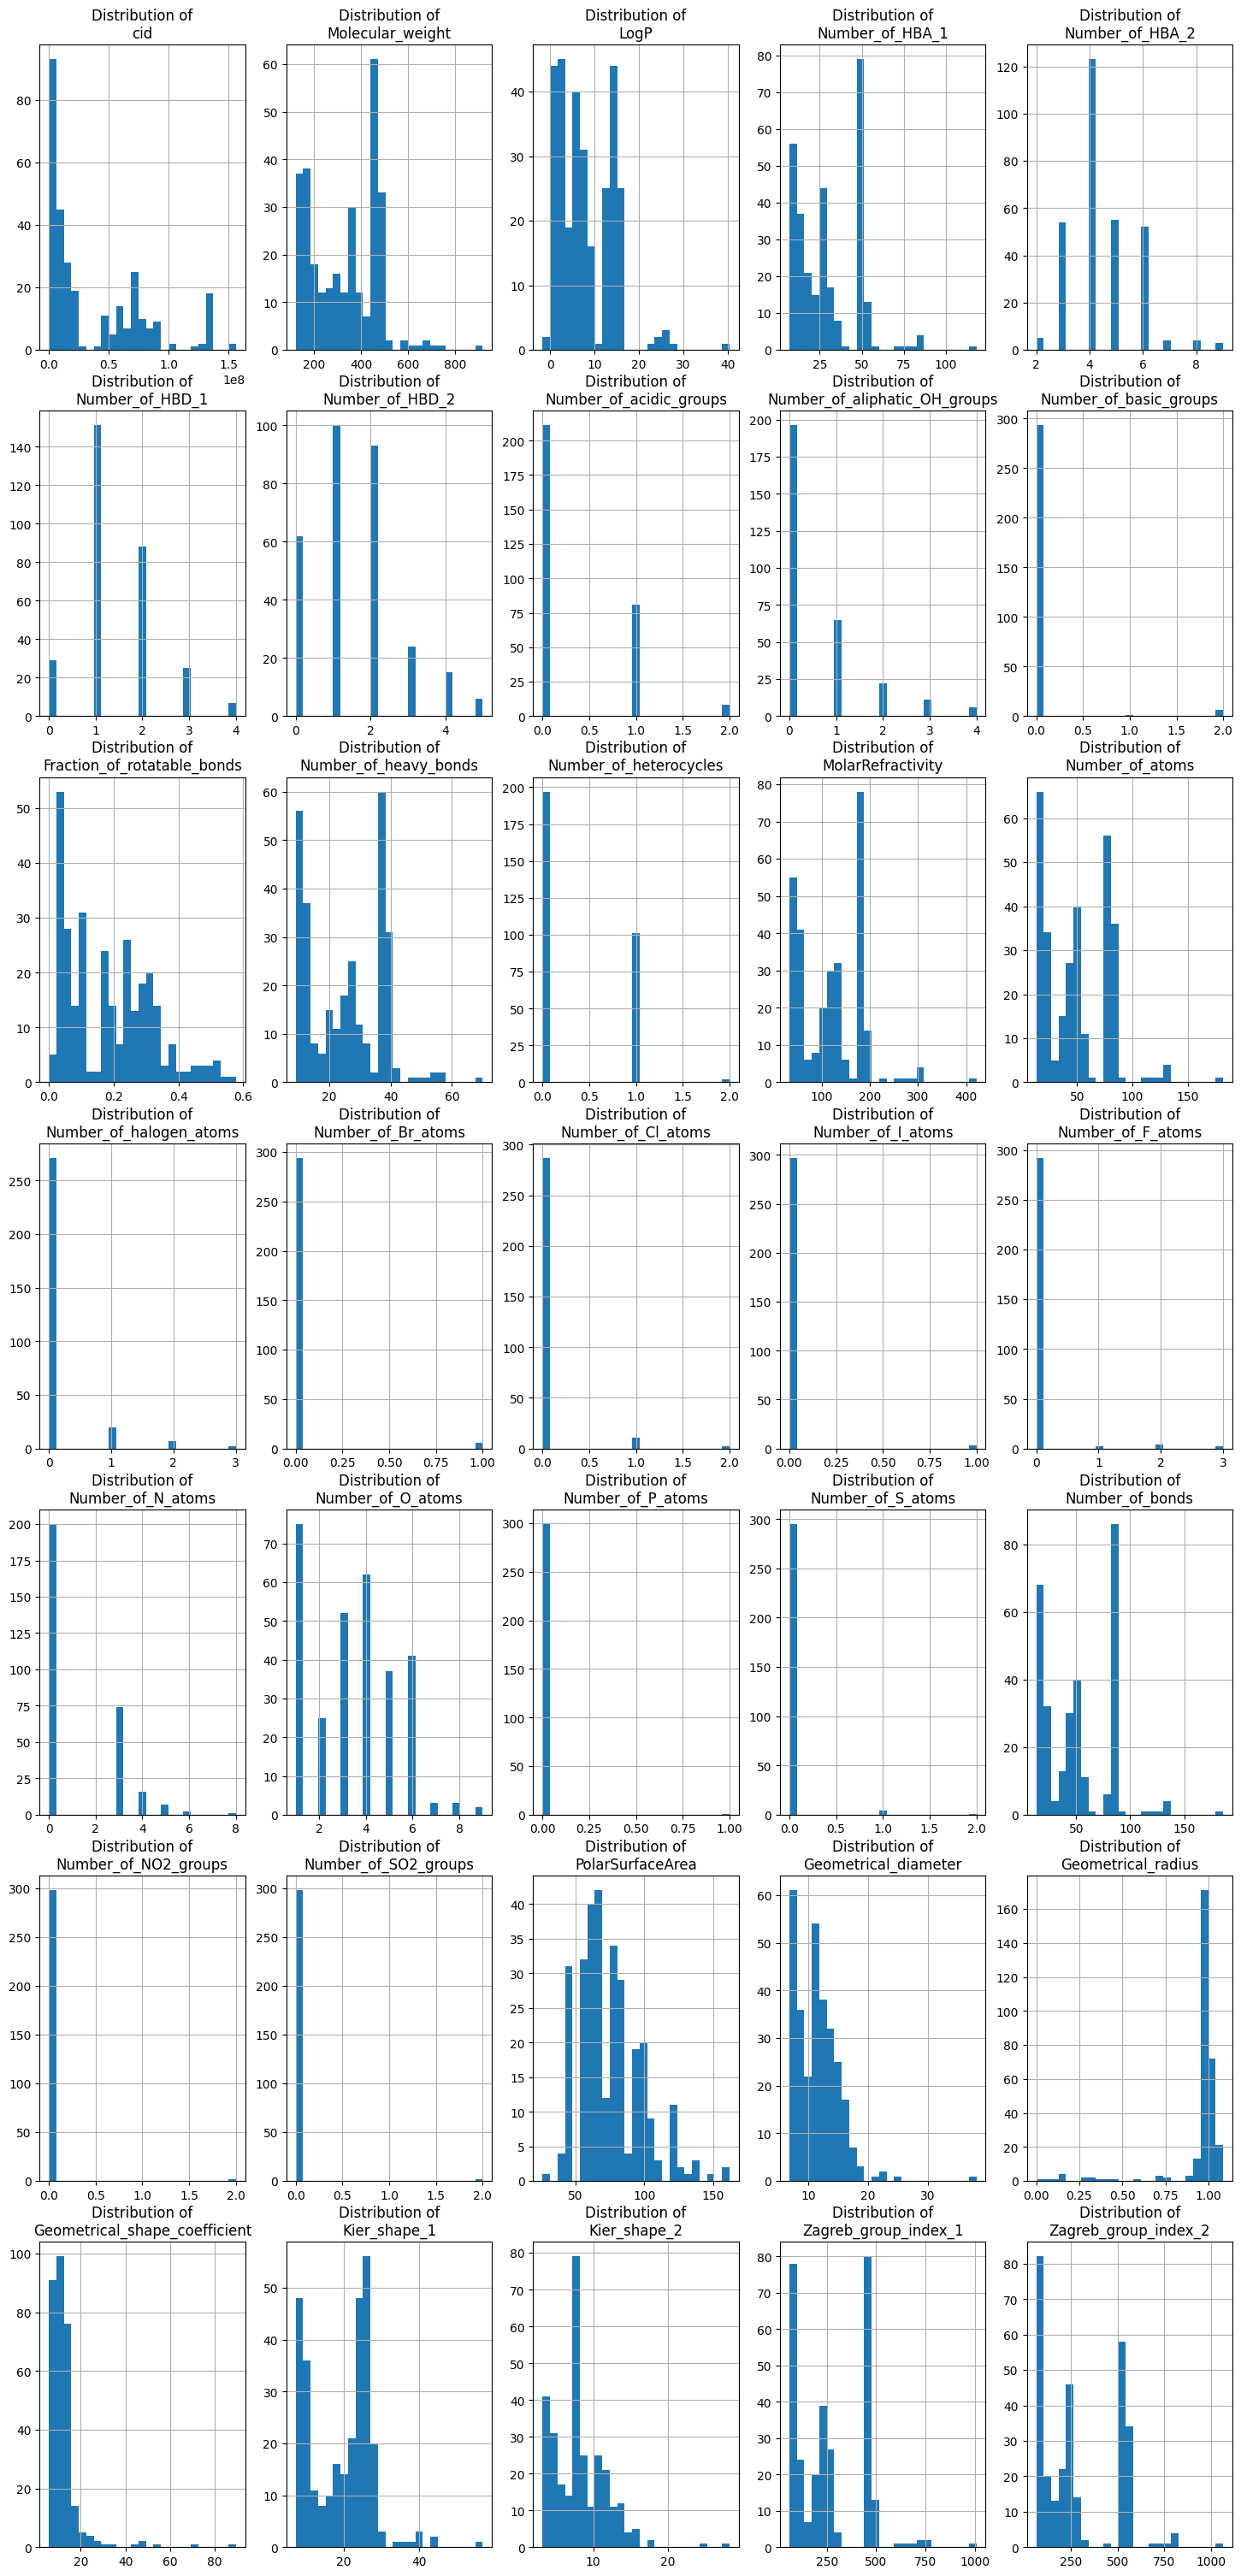

In [33]:
fig, axs = plt.subplots(7, 5, figsize=(18, 38))

for feature,columna in enumerate(df_train.columns):
    row = feature // 5
    col = feature % 5
    axs[row, col].hist(df_train[columna], bins=25)
    axs[row, col].set_title(('Distribution of\n' +  columna))
    axs[row, col].grid()

Se muestra los diagramas de caja de bigote

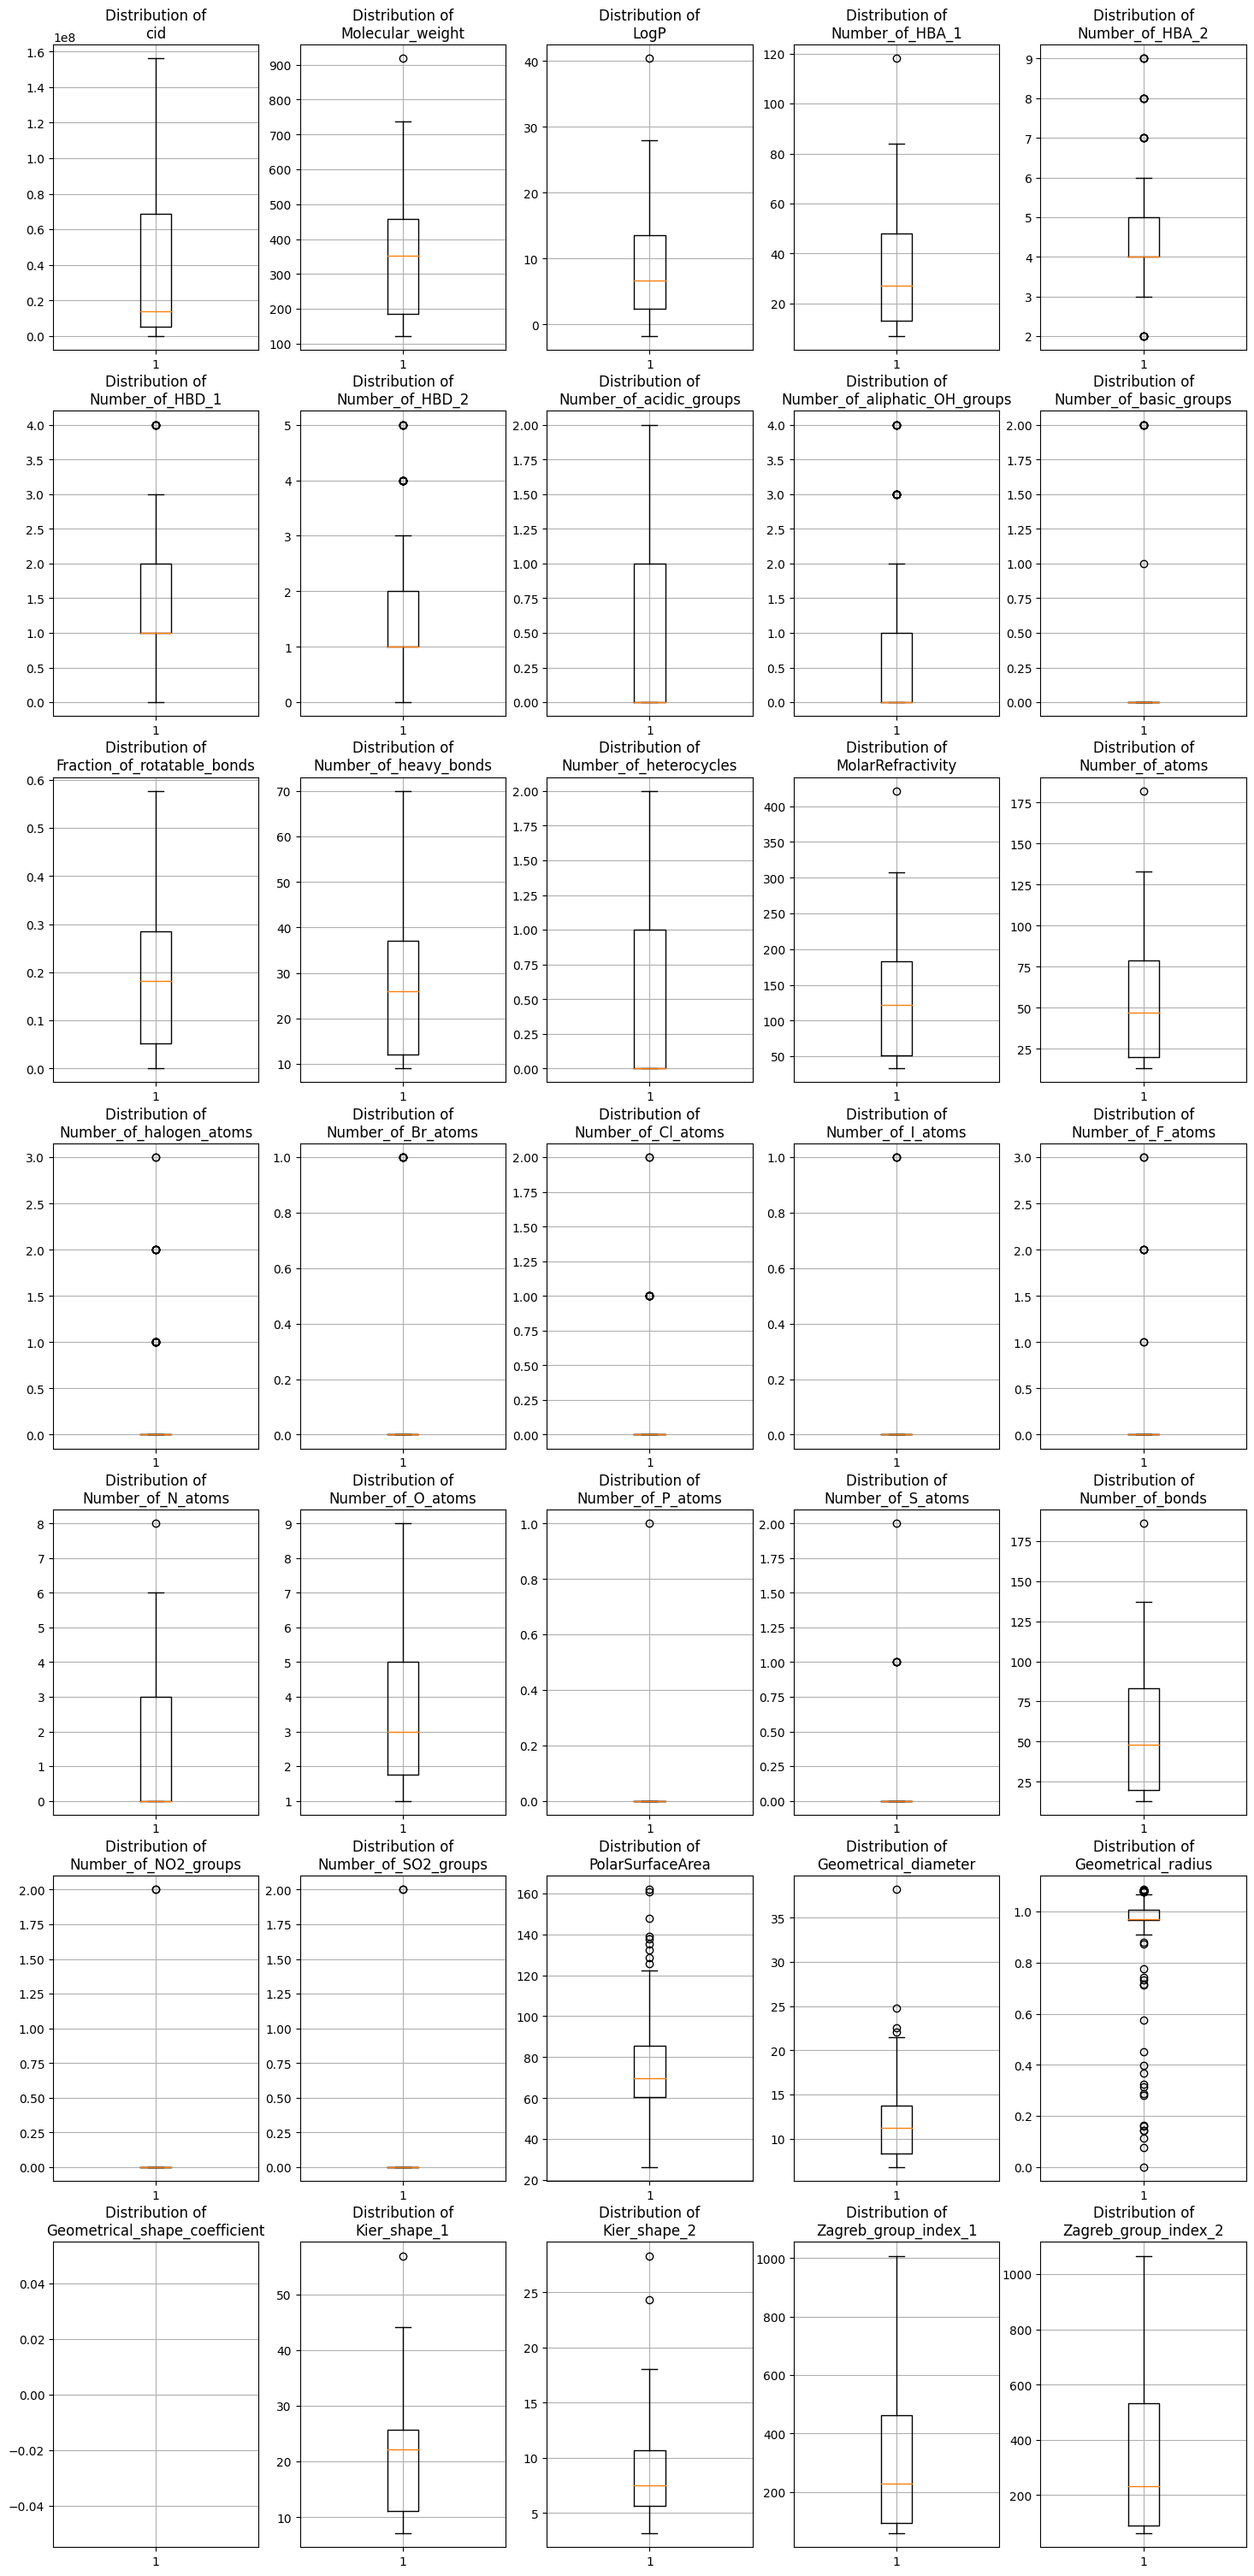

In [34]:
fig, axs = plt.subplots(7, 5, figsize=(18, 38))

for feature,columna in enumerate(df_train.columns):
    row = feature // 5
    col = feature % 5
    axs[row, col].boxplot(df_train[columna])
    axs[row, col].set_title(('Distribution of\n' +  columna))
    axs[row, col].grid()

Se presenta la matriz de correlación de los datos

<Axes: >

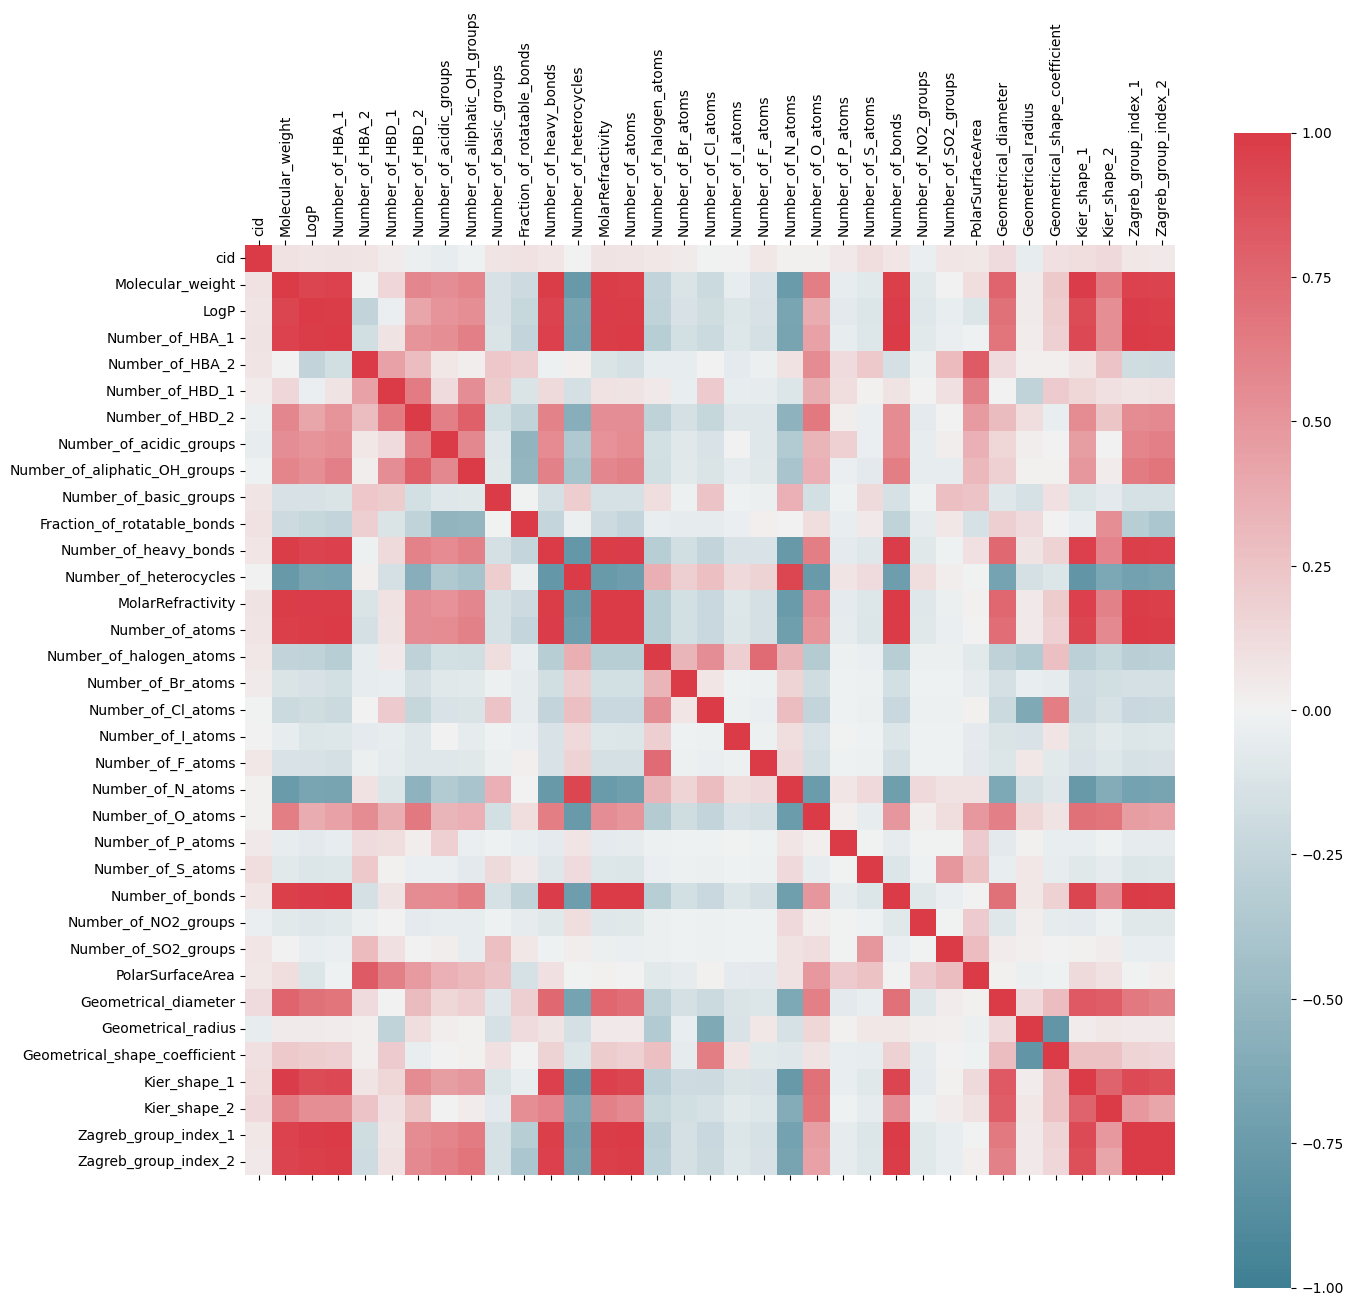

In [35]:
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Continuando con el análsis de datos, se muestra la información resumida de los dataframe (train, test y sample_submission), donde se nota que no existen datos nulos, por lo que no es necesario aplicar una técnica de imputación de datos, además de que no se pueden identificar outliers dado que se está trabajando con variables del tipo binario.

# Preprocesamiento

De acuerdo con el análsis de datos de la sección de "Análisis exploratorio",se observó que existe un dato nulo en la columna "Geometrical_shape", por lo que se eliminará dicha fila, además de que no se pueden identificar outliers dado que se está trabajando con descriptores moleculares de moléculas cuya naturaleza no está restringida de acuerdo con los alcances brindados en la problemática.

In [36]:
df_train = df_train.dropna()
print(df_train.info())
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            299 non-null    int64  
 1   Molecular_weight               299 non-null    float64
 2   LogP                           299 non-null    float64
 3   Number_of_HBA_1                299 non-null    int64  
 4   Number_of_HBA_2                299 non-null    int64  
 5   Number_of_HBD_1                299 non-null    int64  
 6   Number_of_HBD_2                299 non-null    int64  
 7   Number_of_acidic_groups        299 non-null    int64  
 8   Number_of_aliphatic_OH_groups  299 non-null    int64  
 9   Number_of_basic_groups         299 non-null    int64  
 10  Fraction_of_rotatable_bonds    299 non-null    float64
 11  Number_of_heavy_bonds          299 non-null    int64  
 12  Number_of_heterocycles         299 non-null    int

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_NO2_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
count,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,3.591029e+07,335.103541,7.947166,30.173913,4.448161,1.431438,1.498328,0.324415,0.555184,0.043478,...,0.013378,0.013378,75.156154,11.489118,0.949121,12.222353,19.544572,8.185348,268.859532,292.528428
std,4.070267e+07,143.102195,6.128274,18.289888,1.209507,0.865724,1.168302,0.523065,0.926564,0.286349,...,0.163297,0.163297,22.384674,3.632345,0.160424,8.281095,8.107739,3.574044,176.889171,207.645966
min,1.046000e+03,122.115432,-1.765100,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,26.300000,6.792787,0.077575,5.665398,7.111111,3.164062,59.000000,62.000000
25%,5.281232e+06,185.622997,2.403450,13.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,60.360000,8.302852,0.967995,7.686705,11.076923,5.612245,95.000000,90.500000
50%,1.388347e+07,352.385992,6.700400,27.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,68.870000,11.228772,0.970938,10.949384,22.290809,7.527734,232.000000,234.000000
75%,6.895019e+07,456.710990,13.586750,48.000000,5.000000,2.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,85.220000,13.768472,1.007559,13.675099,25.641274,10.682117,462.000000,534.000000
max,1.560257e+08,917.629981,40.375700,118.000000,9.000000,4.000000,5.000000,2.000000,4.000000,2.000000,...,2.000000,2.000000,161.800000,38.162784,1.085336,89.461191,56.908163,28.296312,1008.000000,1066.000000


Por otro lado, se verifica que no existan filas repetidas, al no haber filas duplicadas, ya no se elimina niguna fila del dataframe.

In [37]:
#Función que marca con False a las filas que no son repetidas
filas_duplicadas = df_train.duplicated(keep=False)
#Se imprimen las filas duplicadas en caso lo hayan
if filas_duplicadas.any():
    print("Filas duplicadas:",df_train[filas_duplicadas])
else:
    print("No hay filas duplicadas.")

No hay filas duplicadas.


# Modelo de aprendizaje no supervisado

Aplicación de modelos de aprendizaje no supervisado y reducción de la dimensionalidad

##Reducción de la dimensionalidad

Antes de realizar la reducción de la dimensionalidad, se hace una copia del dataframe, donde el nuevo dataframe elimina el "cid", dado que dicha columna contiene el identificador de la molécula, en ese sentido, el PCA se aplicará en el nuevo dataframe, ya que solo se quieren hacer la reducción de dimensaionalidad tomando en cuenta solamente los descriptores moleculares.

In [38]:
#Se realiza una copia del dataframe, donde el nuevo dataframe elimina el cid, dado que dicha columna contiene el identificador de
df_train2 = df_train.drop(["cid"], axis=1)

Se muestra el gráfico de varianza explicada vs el número de dimensiones, además del cálculo de los componentes necesarios que resultó en 14.

Número de dimensiones para preservar el 95% de la varianza: 14


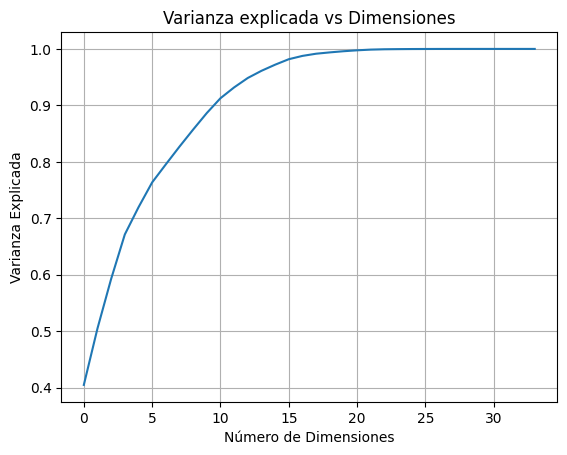

In [39]:
#Se estandarizan los datos del dataframe df_train2
scaler = StandardScaler()
df_std = scaler.fit_transform(df_train2)

#Se crea una instancia de PCA y se ajustan los datos estanzarizados
pca = PCA()
pca.fit(df_std)

#Se calcula la varianza acumulativa
varianza_acumulativa = np.cumsum(pca.explained_variance_ratio_)

#Se grafica el gráfico de varianza explicada vs el número de dimensiones
plt.plot(varianza_acumulativa)
plt.title("Varianza explicada vs Dimensiones")
plt.xlabel("Número de Dimensiones")
plt.ylabel("Varianza Explicada")
plt.grid()
num_componentes_95_varianza = np.argmin(varianza_acumulativa < 0.95) + 1

#Finalmente, se calcula el número de componentes necesarios para preservar la varianza del 95%
print(f"Número de dimensiones para preservar el 95% de la varianza: {num_componentes_95_varianza}")

Se realiza la reducción de componentes considerando 14 como el número de dimensiones que preservan la varianza de los datos originales en un 95%

In [40]:
pca2 = PCA(n_components=14)
df_std_pca=pca2.fit_transform(df_train2)

In [41]:
print(df_std_pca)

[[-3.85552692e+02 -4.97530320e+01 -5.26718222e+00 ... -6.08725776e-01
  -1.17838829e-01 -1.28692550e-01]
 [-3.36820149e+02 -1.73517617e+01 -3.50491275e+01 ... -3.13835457e-01
   1.34585072e-01  6.21448992e-02]
 [-2.93645456e+02  5.76430894e+01  1.91585199e+01 ...  1.33078826e+00
  -2.34543245e+00  3.43357436e+00]
 ...
 [ 3.02002183e+01  7.66806275e+01  1.31460182e+01 ... -1.29850476e-01
  -4.08447067e-01  6.03025976e-02]
 [ 1.65851475e+01  1.04587926e+02 -2.51761554e+01 ...  2.06365619e-01
  -6.76704112e-01 -1.78808629e-01]
 [-1.05715757e+01  3.59417846e+01  1.05026819e+01 ...  2.22829174e-01
   1.95178797e-01 -1.64324274e-03]]


##Modelo de aprendizaje no supervisado

Antes de implementar el modelo de aprendizaje no supervisado, se evalúa el mejor número de k en función al silhouette score y el puntaje de inercia. A partir de los gráficos, se determinó que el mejor agrupamiento se da con k=4

##Métricas

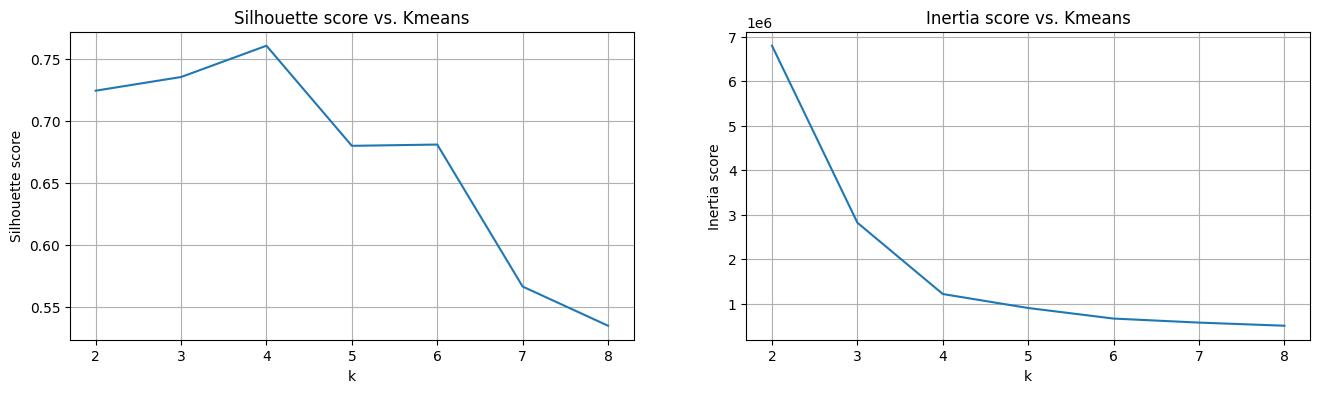

In [42]:
sil_score=[]
inertia_score=[]
k=[]
#Bucle que calcula los puntajes para cada número de dimensiones
for i in range(2,9):
  kmeans=KMeans(n_clusters=i,init="k-means++",n_init=50,max_iter=500,random_state=42)
  y_pred=kmeans.fit_predict(df_std_pca)
  sil_score.append(silhouette_score(df_std_pca,kmeans.labels_))
  inertia_score.append(-1*kmeans.score(df_std_pca))
  k.append(i)
#Se muestran los gráficos
fig, (axs1,axs2) = plt.subplots(1, 2, figsize=(16, 4))
axs1.plot(k,sil_score)
axs1.set_title("Silhouette score vs. Kmeans")
axs1.set_xlabel('k')
axs1.set_ylabel('Silhouette score')
axs1.grid()
axs2.plot(k,inertia_score)
axs2.set_title("Inertia score vs. Kmeans")
axs2.set_xlabel('k')
axs2.set_ylabel('Inertia score')
axs2.grid()

Con k=4, se implementa el modelo de aprendizaje no supervisado K-Means

In [43]:
kmeans=KMeans(n_clusters=4,init="k-means++",n_init=50,max_iter=500,random_state=42)
y_pred=kmeans.fit_predict(df_std_pca)

Se crea un nuevo dataFrame que es igual al df_train2 con una columna adicional para las etiquetas de los grupos obtenidos a partir del modelo K-Means (k=4)

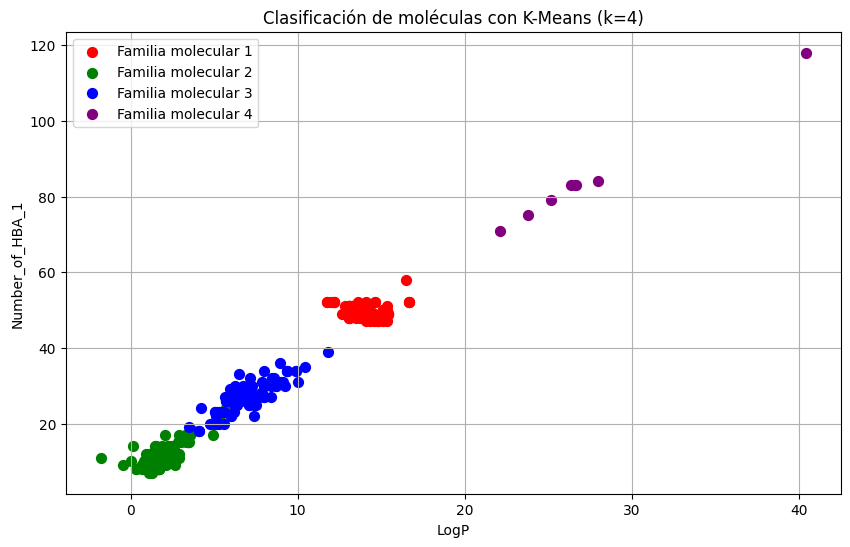

In [44]:
# Creación del nuevo dataframe
df_agrupado = df_train2.copy()
df_agrupado['Cluster'] = y_pred

# Se crea el gráfico de dispersión para visualizar la clasificación
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple']  # Colores de los grupos

#Se extraen los datos para las columnas "Caracteristica1" y "Caracteristica2"
Caracteristica1=1
Caracteristica2=2

for i in range(4):  # Suponiendo que hay 4 clusters
    cluster_data = df_agrupado[df_agrupado['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, Caracteristica1], cluster_data.iloc[:, Caracteristica2], s=50, c=colors[i], label=f'Familia molecular {i+1}')

plt.title('Clasificación de moléculas con K-Means (k=4)')
plt.xlabel(df_agrupado.columns[Caracteristica1])
plt.ylabel(df_agrupado.columns[Caracteristica2])
plt.legend()
plt.grid()
plt.show()

#Resumen

En el challenge 5, se ha desarrollado un modelo de aprendizaje no supervisado, para lograr ello, primero se realizó un análisis de los datos (descriptores moleculares) donde se mostró la distribución de los datos mediante histogramas,diagrama de caja y una matriz de correlación. En seguida se identificaron las columnas con datos invariables para ser eliminados, de igual forma se identificaron los valores nulos.

En la sección de preprocesamiento se eliminaron los valores nulos y se verificó que no existan filas duplicadas. Después de realizar el preprocesamiento se comenzó con a desarrollar el modelo de aprendizaje no supervisado. Para ello, primero se aplicó la técnica de reducción de dimensionalidad PCA, donde se evaluaró el número optimo de dimensiones para conservar un 95% de varianza, dando como resultado un número de dimensiones igual a 14.

En seguida se desarrolló el modelo de aprendizaje no supervisado K-Means, el cual tuvo como dataframe de entrada al dataframe reducido por PCA. para poder desarrollar el modelo, se evaluó el número de grupos óptimos mediante las métricas de inerciay Silhouette, teniendo como número óptimo k=4.

Por último, se mostraron los resultados de agrupamiento, donde se obtuvieron 4 grupos de familiar moleculares por lo que se intuye que se han infiltrado moléculas que no corresponden con las 3 primeras familias moleculares identificadas.

